# Export username, input, output, Run_id from the root runs

In [1]:
usernames = []
inputs = []
ouputs = []
run_ids = []
feedback_stats = []

In [2]:
from langsmith import Client

# Initialize the LangSmith client
client = Client(api_key='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')

# Get runs (modify filters based on your needs)
runs = client.list_runs(project_name="counseling", is_root=1)

jsons = []

for run in runs :
    jsons.append(run)
    usernames.append(run.metadata['username'])
    inputs.append(run.inputs['user_input'])
    ouputs.append(run.outputs['output'])
    run_ids.append(run.id)


In [215]:
print(f'Total runs: {len(jsons)}')

Total runs: 102


In [216]:
#create a datfarame contains all the data from username, input, output, run_id
import pandas as pd
df = pd.DataFrame(list(zip(usernames, inputs, ouputs, run_ids)), columns =['username', 'input', 'output', 'run_id'])
df.to_csv('data.csv', index=False)

In [217]:
df.username.unique()

array(['SALAH', 'Amna ', 'Nico', 'Malak Elmouedden', 'Salah', 'yousra',
       'Karim',
       'Propose Supply Chain masters  taught in English and with a duration of 1 year',
       'CYRUS', 'nico', 'Leonard Jappini',
       'can you show me the best program for MSc in Finance I want to work as trader ',
       'cyrus', 'Ei Mya', 'manal elkobbi ', 'Dhikra', 'omar', 'Beshoy',
       'hi', 'Yousra', 'beshoy', 'foog', 'ahmed'], dtype=object)

In [218]:
#remove any usernames containing more than 3 spaces after spliting by space
df = df[df['username'].apply(lambda x: len(x.split()) <= 3)]

In [219]:
#drop username hi
df = df[df['username'] != 'hi']

In [220]:
df.username.unique()

array(['SALAH', 'Amna ', 'Nico', 'Malak Elmouedden', 'Salah', 'yousra',
       'Karim', 'CYRUS', 'nico', 'Leonard Jappini', 'cyrus', 'Ei Mya',
       'manal elkobbi ', 'Dhikra', 'omar', 'Beshoy', 'Yousra', 'beshoy',
       'foog', 'ahmed'], dtype=object)

In [221]:
#make all usernames lowercase
df['username'] = df['username'].str.lower()

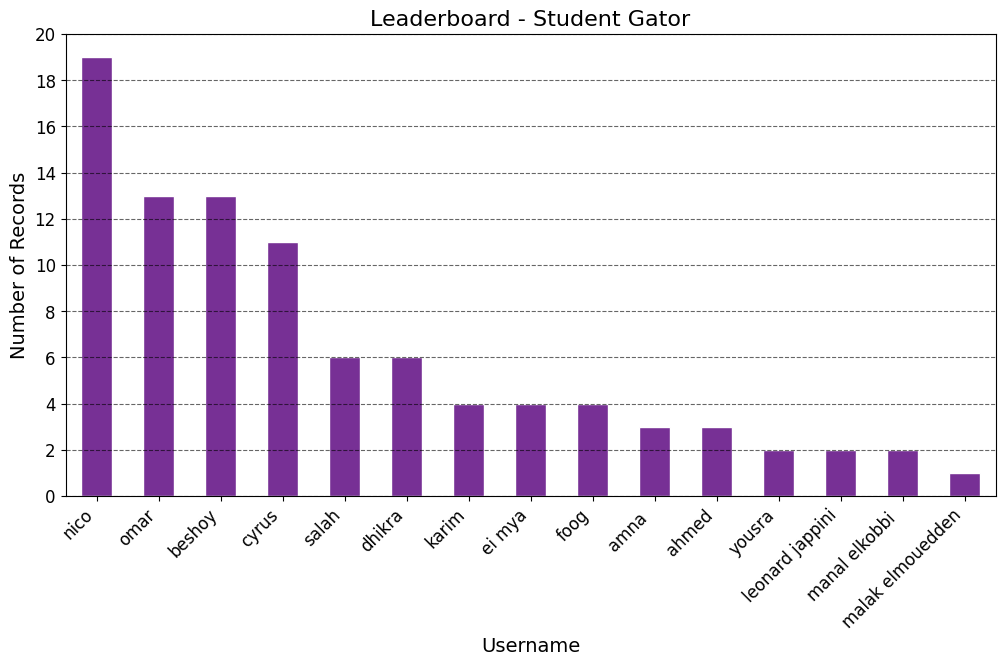

In [222]:
import matplotlib.pyplot as plt
user_counts = df["username"].value_counts()

# Define company colors
background_color = "#ffffff"  # Dark purple
text_color = "black"
bar_color = "#773095"  # Lighter purple shade

# Create the plot
plt.figure(figsize=(12, 6), facecolor=background_color)
ax = plt.gca()
ax.set_facecolor(background_color)

# Plot bar chart
user_counts.plot(kind="bar", color=bar_color, edgecolor="white")

# Set labels and title with custom colors
plt.xlabel("Username", fontsize=14, color=text_color)
plt.ylabel("Number of Records", fontsize=14, color=text_color)
plt.title("Leaderboard - Student Gator", fontsize=16, color=text_color)

# Modify tick colors
plt.xticks(rotation=45, ha="right", color=text_color, fontsize=12)
plt.yticks(range(0, max(user_counts) + 2, 2), color=text_color, fontsize=12)

# Grid styling
plt.grid(axis="y", linestyle="--", alpha=0.6, color="black")

# Show the updated plot
plt.show()

In [227]:
#create a dataframe for the feedbacks contains the run_id, feedback.comment
feedbacks = []
run_ids = []
human_feedback = client.list_feedback(run_ids=df['run_id'])
for feedback in human_feedback:
    feedbacks.append(feedback.comment)
    run_ids.append(feedback.run_id)


In [228]:
#create a datafrmae for the feedbacks containing the run_id and feedback.comment
df_feedback = pd.DataFrame(list(zip(run_ids, feedbacks)), columns =['run_id', 'feedback'])
df_feedback.to_csv('feedback.csv', index=False)


In [229]:
df_feedback
# run_id columns should be unique, conactenate the feedbacks with the same run_id
df_feedback = df_feedback.groupby('run_id')['feedback'].apply(' '.join).reset_index()

In [230]:
merged_df = df.merge(df_feedback, on="run_id", how="left")
merged_df.fillna("None", inplace=True)  # Fill missing feedback with "None"
merged_df
#export this merged df
merged_df.to_excel('merged_data.xlsx', index=False)